#BDDA Project: Credit Card Fraud Detection
<BR>Made By: Group 7</BR>

* Swapnil Malik-015016
* Sumit Gupta- 015022 
* Muskan Jain- 015034
* Pragya Jain- 015038
* Sarthak Kumar- 015042


The datasets contains transactions made by credit cards in September 2013 by European cardholders. 

In [ ]:
# 1.0 Mount your google drive 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# 1.1 Call libraries
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import seaborn as sns
import imblearn                       # used for undersampling method
from imblearn import under_sampling
from imblearn.under_sampling import NearMiss
import random, gc
import os,time
LABELS = ["Normal", "Fraud"]

In [ ]:
# 1.2 Change folder to where dataset is:
path =  "/content/drive/MyDrive/Credit card fraud detection"
os.listdir(path)

['creditcard.csv.zip']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Credit card fraud detection/creditcard.csv.zip')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
x = df.iloc[:,1:30].values
y = df.iloc[:,30].values

In [ ]:
print ("Input Range:", x.shape)
print ("Output Range:", y.shape)

Input Range: (284807, 29)
Output Range: (284807,)


In [ ]:
print ("Class Labels: \n", y)

Class Labels: 
 [0 0 0 ... 0 0 0]


# **Exploratory Data Analysis**

In [ ]:
# checking duplicates
df.duplicated(keep='first').sum()

1081

In [ ]:
# Visualizing duplicate rows
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [ ]:
# removing the duplicated rows
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
 df.duplicated().sum()

0

In [ ]:
# Checking missing data
df.isnull().values.any()

False

There is no missing data in the entire dataset.

In [ ]:
# Get the Fraud and the Normal dataset
fraud_data = df[df['Class']==1]
normal_data = df[df['Class']==0]

In [ ]:
#get to know how many fraud rows
print(fraud_data.shape,normal_data.shape)

(473, 31) (283253, 31)


In [ ]:
## We need to analyse more amount of information from the transaction data
## How different are the amount of money used in different transaction classes?
#statistical summary of fraudulant data
fraud_data.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#statistical summary of normal data
normal_data.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

Text(0, 0.5, 'No. of occurences')

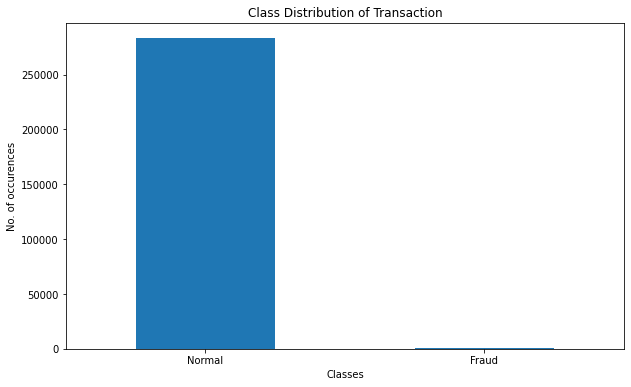

In [ ]:
set_class = pd.value_counts(df['Class'],sort = True)
set_class.plot(kind = 'bar', rot=0, figsize = (10,6))
plt.title("Class Distribution of Transaction")
plt.xticks (range(2), LABELS)
plt.xlabel ("Classes")
plt.ylabel("No. of occurences")

Now, seeing the above output, we can definitely say it is a highly unbalanced dataset with respect with target variable **Class** and if we do modelling, our model might get biased and give the proper accuracy with these imbalanced dataset. So first we will try to balance the dataset by using UnderSampling method.

In [ ]:
# splitting the dataset into independent and dependent features

X = df.drop(['Class'], axis = 1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
X.shape

(283726, 30)

In [ ]:
Y = df['Class']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
Y.shape

(283726,)

In [ ]:
# Implementing UnderSampling to handle imbalanced dataset
nm = NearMiss()
X1, Y1 = nm.fit_sample(X,Y)
X1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(946, 30)

In [ ]:
Y1.shape

(946,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x432 with 0 Axes>

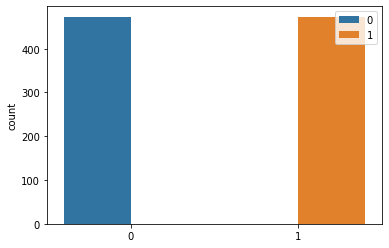

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.countplot(Y1, hue = Y1)
plt.figure (figsize = (10,6))

As from the above plot we can say that the dataset is now balanced and we can now apply any model.

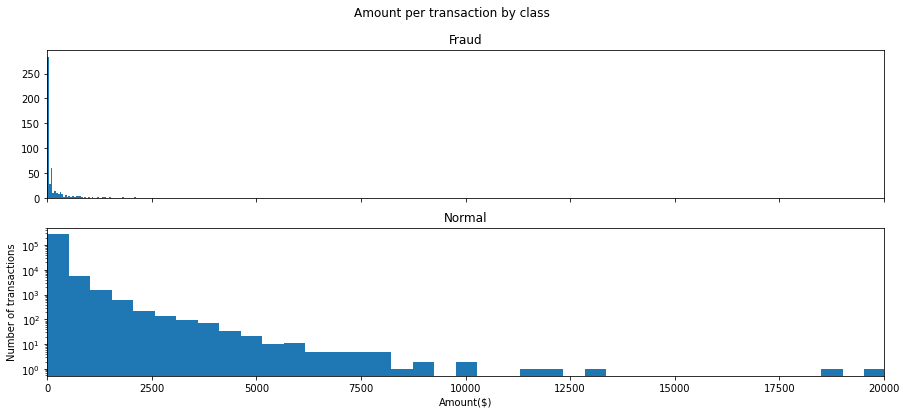

In [ ]:
# How was the transactions made? (Amounts & class)
f, (ax1, ax2) = plt.subplots (2,1, sharex = True, figsize = (15,6))
f.suptitle ('Amount per transaction by class')
bins = 50
ax1.hist (fraud_data.Amount, bins = bins)
ax1.set_title ('Fraud')
ax2.hist (normal_data.Amount, bins = bins)
ax2.set_title ('Normal')
plt.xlabel ('Amount($)')
plt.ylabel ('Number of transactions')
plt.xlim ((0,20000))
plt.yscale ('log')
plt.show();

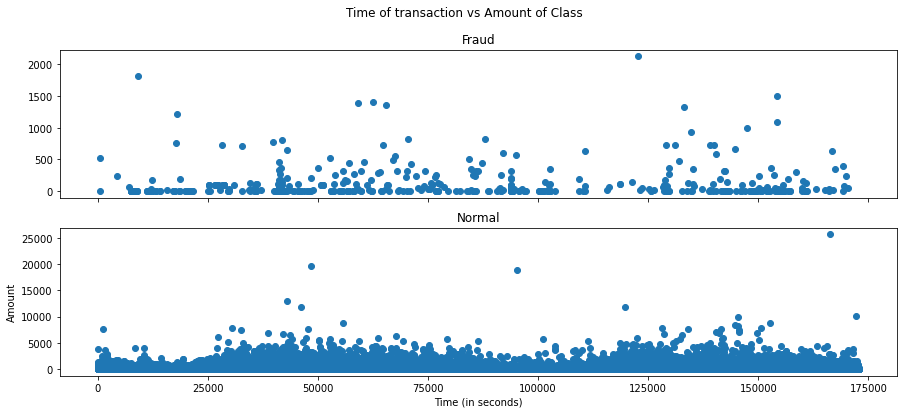

In [ ]:
# We will check, Do fraudulent transactions occur more often during certain time frame? 

f, (ax1, ax2) = plt.subplots(2,1,sharex = True, figsize = (15,6))
f.suptitle ('Time of transaction vs Amount of Class')
ax1.scatter (fraud_data.Time, fraud_data.Amount)
ax1.set_title ('Fraud')
ax2.scatter (normal_data.Time, normal_data.Amount)
ax2.set_title ('Normal')
plt.xlabel ('Time (in seconds)')
plt.ylabel ('Amount')
plt.show()

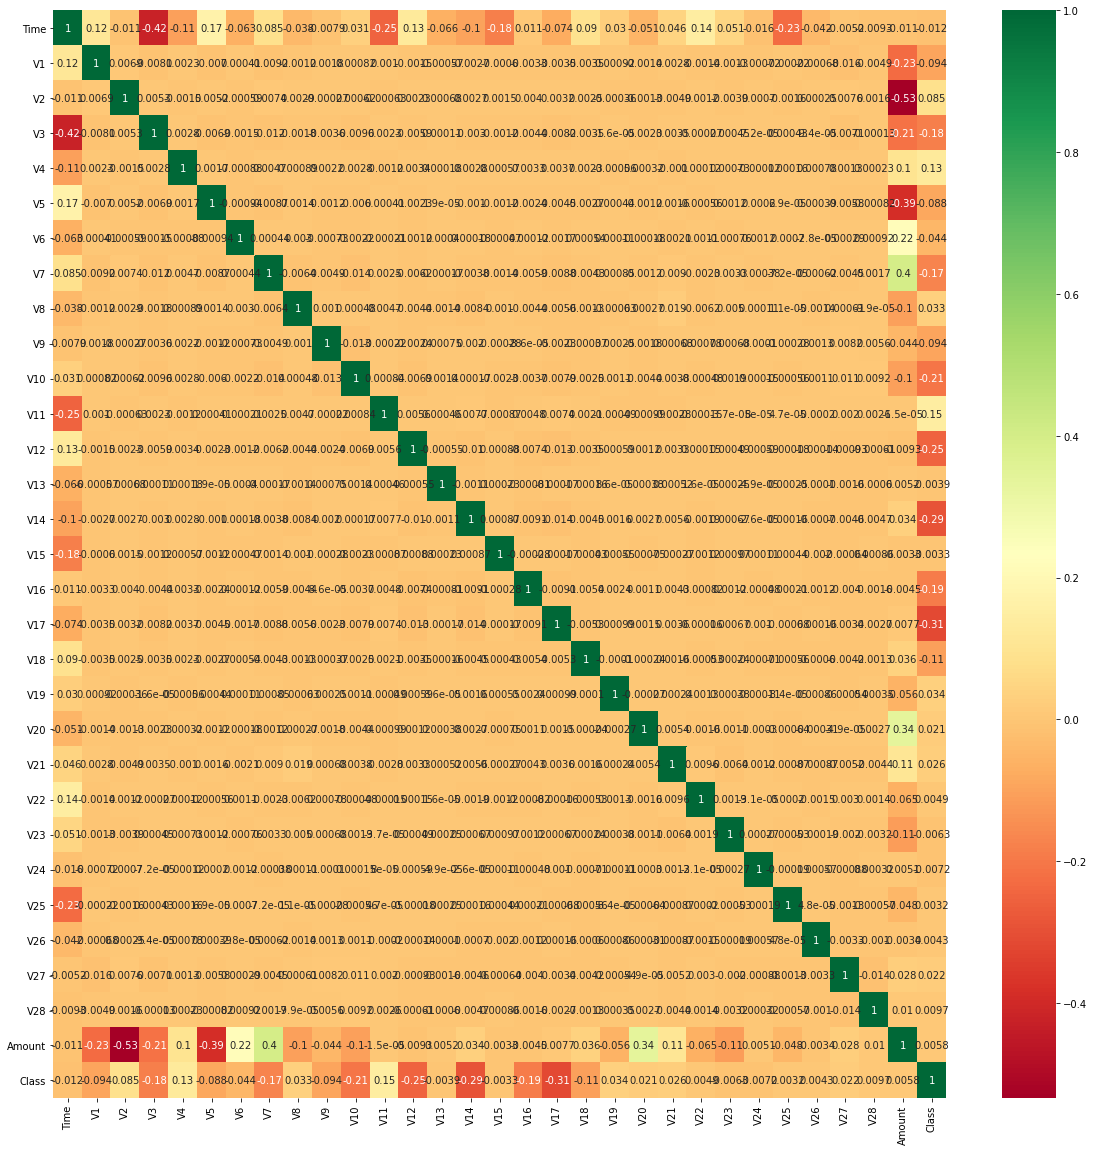

In [ ]:
#Correlation (get correlations of each features in dataset)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
cc = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap = "RdYlGn")

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split (X1,Y1,test_size = 0.20, random_state = 40)

In [ ]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape : ", ytest.shape)

xtrain.shape :  (756, 30)
xtest.shape :  (190, 30)
ytrain.shape :  (756,)
ytest.shape :  (190,)


In [ ]:
# Logistic Regression model
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predicted = model.predict(xtest)

In [ ]:
print ("y_predicted : \n", y_predicted)

y_predicted : 
 [0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [ ]:
cm = confusion_matrix (ytest, y_predicted)
print('confusion matrix : \n', cm)

confusion matrix : 
 [[96  0]
 [28 66]]


In [ ]:
# Validating the Prediction
Accuracy_model = ((cm[0][0] + cm[1][1]) / cm.sum())*100
print  ("Accuracy_Decision : ", Accuracy_model)

Error_rate_model = ((cm[0][1] + cm[1][0]) / cm.sum())*100
print  ("Error_rate_Decision : ", Error_rate_model)

# True Fake Rate
Specificity_model = (cm[1][1] / (cm[1][1] + cm[0][1]))*100
print  ("Specificity_Decision : ", Specificity_model)

# True Genuine Rate
Sensitivity_model = (cm[0][0] / (cm[0][0] + cm[1][0]))*100
print  ("Sensitivity_Decision : ", Sensitivity_model)

Accuracy_Decision :  85.26315789473684
Error_rate_Decision :  14.736842105263156
Specificity_Decision :  100.0
Sensitivity_Decision :  77.41935483870968


In [ ]:
stdsc = StandardScaler() # as all the values are not distributed uniformly, so we need to transform training & testing set in a proper way in order to understand it
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [ ]:
# given the command to print the standardized of xtrain
print ("Training set after standardized : \n", xtrain[0])

Training set after standardized : 
 [-1.02650759 -2.00455904  1.42207707 -1.64114033  2.05755493 -2.2784873
 -1.29530013 -2.0641199   1.8759522  -2.95752673 -2.23684225  1.26158253
 -1.94428596  1.58116877 -1.33901089  0.63070513 -2.65880548 -2.98760305
 -3.02145371  2.47522151 -1.0404011   1.33306326  0.4624553  -0.3541416
  1.35647465  0.35159726  0.65800832 -1.5417339  -1.70274768 -0.34252994]


In [ ]:
dt_classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 0) # entropy is used for information gain otherwise default one is gini index
dt_classifier.fit (xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_decision_tree = dt_classifier.predict (xtest)

In [ ]:
print ("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1]


In [ ]:
com_decision = confusion_matrix (ytest, y_pred_decision_tree)
print('confusion matrix : \n', com_decision)

confusion matrix : 
 [[83 13]
 [ 7 87]]


In [ ]:
# Validating the Prediction
Accuracy_model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum())*100
print  ("Accuracy_Decision : ", Accuracy_model)

Error_rate_model = ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum())*100
print  ("Error_rate_Decision : ", Error_rate_model)

# True Fake Rate
Specificity_model = (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1]))*100
print  ("Specificity_Decision : ", Specificity_model)

# True Genuine Rate
Sensitivity_model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0]))*100
print  ("Sensitivity_Decision : ", Sensitivity_model)

Accuracy_Decision :  89.47368421052632
Error_rate_Decision :  10.526315789473683
Specificity_Decision :  87.0
Sensitivity_Decision :  92.22222222222223


In [ ]:
# kernel convert low dimensional features to high dimensional features in order to separate it easily
# svc stands for Support Vector Machine Classifier
svc_classifier = SVC (kernel ='rbf', random_state = 0)
svc_classifier.fit (xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred2 = svc_classifier.predict (xtest)

In [ ]:
print("y_pred_randomforest : \n", y_pred2)

y_pred_randomforest : 
 [0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0]


In [ ]:
cm2 = confusion_matrix(ytest, y_pred2)
print("Confusion_matrix : \n\n", cm2)

Confusion_matrix : 

 [[95  1]
 [ 9 85]]


In [ ]:
# Validating the Prediction
Accuracy_model = ((cm2[0][0] + cm2[1][1]) / cm2.sum())*100
print  ("Accuracy_Decision : ", Accuracy_model)

Error_rate_model = ((cm2[0][1] + cm2[1][0]) / cm2.sum())*100
print  ("Error_rate_Decision : ", Error_rate_model)

# True Fake Rate
Specificity_model = (cm2[1][1] / (cm2[1][1] + cm2[0][1]))*100
print  ("Specificity_Decision : ", Specificity_model)

# True Genuine Rate
Sensitivity_model = (cm2[0][0] / (cm2[0][0] + cm2[1][0]))*100
print  ("Sensitivity_Decision : ", Sensitivity_model)

Accuracy_Decision :  94.73684210526315
Error_rate_Decision :  5.263157894736842
Specificity_Decision :  98.83720930232558
Sensitivity_Decision :  91.34615384615384


From this we get to know that svc model is better as it has 94.7% accuracy to use to detect the credit card fraud detection than other models.